In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

## 0. Simulate phone dataset

- ## Simulate data

In [4]:

x = np.random.normal(100,100,400)
x_abs = np.abs(x)

In [5]:
epsilon = np.random.normal(0,50,400)
y = 2*x_abs + 25 + epsilon

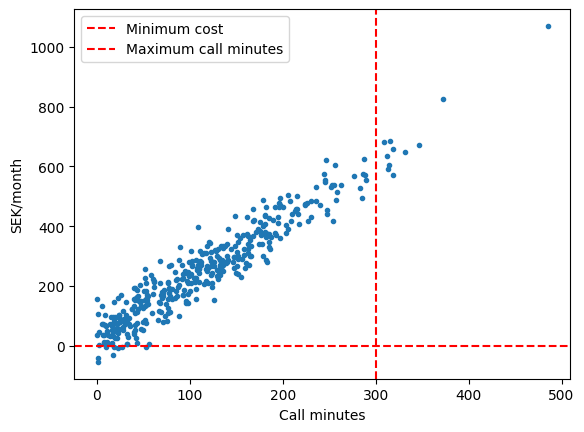

In [6]:
plt.plot(x_abs, y, ".")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, linestyle="--",color="red", label=r"Minimum cost")
plt.axvline(x=300, linestyle="--",color="red", label=r"Maximum call minutes")
plt.legend()

In [7]:
# filter out outliers
mask = (x_abs <= 300) & (y >= 0)
x_abs = x_abs[mask]
y = y[mask]

In [8]:
x_line = np.linspace(0,300,100)
y_line = 2*np.linspace(0,300,100)+25

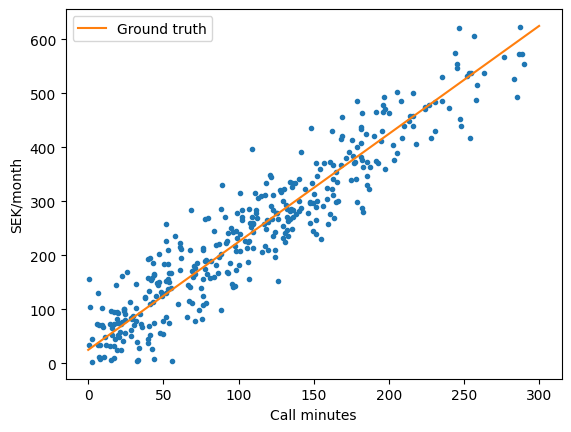

In [9]:
plt.plot(x_abs, y, ".")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.plot(x_line, y_line, label="Ground truth")
plt.legend()

In [10]:
new_df = pd.DataFrame([x_abs, y]).T

In [11]:
new_df.columns = ["Minutes", "Cost"]

In [12]:
new_df.head()

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


# 1. Train|Test split

### Create Train|Test split function

In [13]:
set1 = pd.DataFrame([1,2,3,4,5])
set2 = pd.DataFrame([6,7,8,9,10])

In [14]:
set1

,0
0,1
1,2
2,3
3,4
4,5


In [15]:
set2

,0
0,6
1,7
2,8
3,9
4,10


In [16]:
set1.sort_index()
set2.sort_index()
if len(set1) != len(set2):
    raise ValueError("One set contains more indexes")
if not set1.index.equals(set2.index):
    raise ValueError("Indexes dont match")

In [17]:
import numpy as np
import pandas as pd
import math as math

In [18]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7, random_state=42, replace=False) -> tuple:
    X.sort_index()
    y.sort_index()   

    #Check that the length of indexes and that the dataframes contains the same indexes
    if len(X) != len(y):
        raise ValueError("One set contains more indexes")
    if not X.index.equals(y.index):
        raise ValueError("Indexes dont match")
    
    #Create train amount depending on length of dataframe and initial train fraction
    train_amount = int(len(X)*train_fraction)
    
    #Split the data into train and test function
    X_train = X.sample(n = train_amount, random_state=random_state, replace=False)
    X_test = X.drop(X_train.index)
    y_train = y.sample(n = train_amount, random_state=random_state, replace=False)
    y_test = y.drop(y_train.index)

    #Check that the splits are the length we expect
    if len(X_test) != (len(X) - len(X_train)):
        raise ValueError(f"X_test is not the expected length. X_test Length: {len(X_test)}, X_train Length: {len(X_train)}")
    if len(y_test) != (len(y) - len(y_train)):
        raise ValueError(f"y_test is not the expected length. y_test Length: {len(y_test)}, y_train Length: {len(y_train)}")

    return(X_train, X_test, y_train, y_test)


In [19]:
set1 = pd.DataFrame([0,1,2,3,4,5,7,8,9,10])
set2 = pd.DataFrame([11,12,13,14,15,17,18,19,20,21])


X_train, X_test, y_train, y_test = train_test_split(set1, set2, random_state=np.random.randint(0,100))
print(f"Length X_train: {len(X_train)}")
print(f"Length X_test: {len(X_test)}")
print(f"Length y_train: {len(y_train)}")
print(f"Length y_test: {len(y_test)}")
                                                            

Length X_train: 7
Length X_test: 3
Length y_train: 7
Length y_test: 3


# Simple linear regression with normal equation

Use the normal equation for simple linear regression to solve for the coefficients 
. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data.

In [20]:
# Use the normal equation for simple linear regression to solve for the coefficients. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data.
import seaborn as sns

train = new_df.sample(frac=0.7, random_state=42)
test = new_df.drop(train.index)
train.shape, test.shape

((267, 2), (114, 2))

In [21]:
regression_fit = lambda X,y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(train[["Minutes"]], train["Cost"])
beta_hat

0    2.119626
dtype: float64

ValueError: shapes (4,) and (1,) not aligned: 4 (dim 0) != 1 (dim 0)